### Get the most positive and negative online reviews about a business

How well to the ratings match the sentiment of the review text? 

- Learn the Yelp API https://www.yelp.com/developers
- Search for a business and get reviews
- Use Azure Text Analytics https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/
- Get sentiment of reviews
- Time permitting do negative
- Demonstrate the problem simplification approach

In [1]:
import requests
from IPython.display import display, Image, HTML


## Sentiment

In [2]:

def get_sentiment(text):
    key = '53ba259edc1a45ceb68251988a04fccc'
    endpoint = 'https://ist256-mafudge-text-analytics.cognitiveservices.azure.com/'
    url = f'{endpoint}text/analytics/v3.0/sentiment'
    header = { 'Ocp-Apim-Subscription-Key' : key}
    
    documents = {"documents": [{"id": "1", "language": "en","text": text}]}

    response = requests.post(url, headers=header, json=documents)
    response.raise_for_status()
    data = response.json()
    
    return data['documents'][0]['sentiment']

print(get_sentiment("I do not like green edds and ham. I do not like them sam I am."))
print(get_sentiment("I like scotch. Scotchy-scotch, scotch."))

negative
positive


In [3]:
# search 
yelp_api_key = "PKt-vCvtw-G0WGjf-DKITO0I07fFi6rTt6WuT2vfecT3xCzSMaD1Uf2uKPuN-1A_1gwRZ15qx4DBEWDyYpV4p_3yh-aqAiPUXGxIkken2gCAq8-sXO4W4zh6ZZ_TW3Yx"
url = "https://api.yelp.com/v3/businesses/search"
header = { "Authorization" : f"Bearer {yelp_api_key}" }
query = { "term" : "thai", "location" : "Syracuse, NY" }
response = requests.get(url, params = query, headers = header)
response.json()


{'businesses': [{'id': 'su6OgvIv5u5Wx_c0adqPiw',
   'alias': 'thai-flavor-syracuse',
   'name': 'Thai Flavor',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/JbUTzPG1PLjjzRtDL8D4sg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/thai-flavor-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
   'review_count': 140,
   'categories': [{'alias': 'thai', 'title': 'Thai'}],
   'rating': 4.0,
   'coordinates': {'latitude': 43.05566, 'longitude': -76.0918},
   'transactions': ['delivery', 'pickup'],
   'price': '$$',
   'location': {'address1': '2863 Erie Blvd E',
    'address2': '',
    'address3': '',
    'city': 'Syracuse',
    'zip_code': '13224',
    'country': 'US',
    'state': 'NY',
    'display_address': ['2863 Erie Blvd E', 'Syracuse, NY 13224']},
   'phone': '+13152511366',
   'display_phone': '(315) 251-1366',
   'distance': 3651.3622876428462},
  {'id': 'knoT2pa

In [4]:
# get details 
id = "xkU58y1YhdcZFDqq_ENQGA"
url = f"https://api.yelp.com/v3/businesses/{id}"
response = requests.get(url, headers = header)
response.json()

{'id': 'xkU58y1YhdcZFDqq_ENQGA',
 'alias': 'erawan-thai-restaurant-syracuse',
 'name': 'Erawan Thai Restaurant',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/qAAqcpdVgb5Lh3LFbf0Q7g/o.jpg',
 'is_claimed': False,
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/erawan-thai-restaurant-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
 'phone': '+13154458152',
 'display_phone': '(315) 445-8152',
 'review_count': 121,
 'categories': [{'alias': 'thai', 'title': 'Thai'}],
 'rating': 3.5,
 'location': {'address1': '2724 Erie Blvd E',
  'address2': '',
  'address3': '',
  'city': 'Syracuse',
  'zip_code': '13224',
  'country': 'US',
  'state': 'NY',
  'display_address': ['2724 Erie Blvd E', 'Syracuse, NY 13224'],
  'cross_streets': ''},
 'coordinates': {'latitude': 43.05378, 'longitude': -76.09696},
 'photos': ['https://s3-media3.fl.yelpcdn.com/bphoto/qAAqcpdVgb5Lh3LFbf0Q7g/o.jpg',
  'ht

In [5]:
# get reviews 
id = "xkU58y1YhdcZFDqq_ENQGA"
url = f"https://api.yelp.com/v3/businesses/{id}/reviews"
response = requests.get(url, headers = header)
response.json()

{'reviews': [{'id': '86yHDdflf68TrYG1qMCsYg',
   'url': 'https://www.yelp.com/biz/erawan-thai-restaurant-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&hrid=86yHDdflf68TrYG1qMCsYg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
   'text': 'Their food is really spicy but it so freaking good!\n\nTheir Tom Kha soup is one of my favorites in the area. \n\nTheir pad see ew is mediocre, but I think what...',
   'rating': 4,
   'time_created': '2019-05-20 16:58:37',
   'user': {'id': 'yACLb6lUDPjw0g5JrNwXMg',
    'profile_url': 'https://www.yelp.com/user_details?userid=yACLb6lUDPjw0g5JrNwXMg',
    'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/SeO7QiA--zprDZO_F2Y5Hg/o.jpg',
    'name': 'Kyle S.'}},
  {'id': 'DTJoOWuddfOVvKrC0_l4iw',
   'url': 'https://www.yelp.com/biz/erawan-thai-restaurant-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&hrid=DTJoOWuddfOVvKrC0_l4iw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=H2m

In [6]:
get_sentiment("I don't give one star reviews lightly, nor do I ever throw out food, but Erawan has forced me to do both.  I ordered pad Thai from here.")

'negative'

In [7]:

def yelp_search(term, location):
    querystring = { 'term' : term, 'location' : location }
    header = { 'Authorization' : f'Bearer {yelp_api_key}'}
    search_url = "https://api.yelp.com/v3/businesses/search"
    response = requests.get(search_url, params = querystring, headers=header)
    return response.json()

def yelp_details(id):
    header = { 'Authorization' : f'Bearer {yelp_api_key}'}
    details_url = f"https://api.yelp.com/v3/businesses/{id}"
    response = requests.get(details_url, headers = header)
    return response.json()
        
def yelp_reviews(id):
    header = { 'Authorization' : f'Bearer {yelp_api_key}'}
    details_url = f"https://api.yelp.com/v3/businesses/{id}/reviews"
    response = requests.get(details_url, headers = header)
    return response.json()


Enter a cuisine: pizza


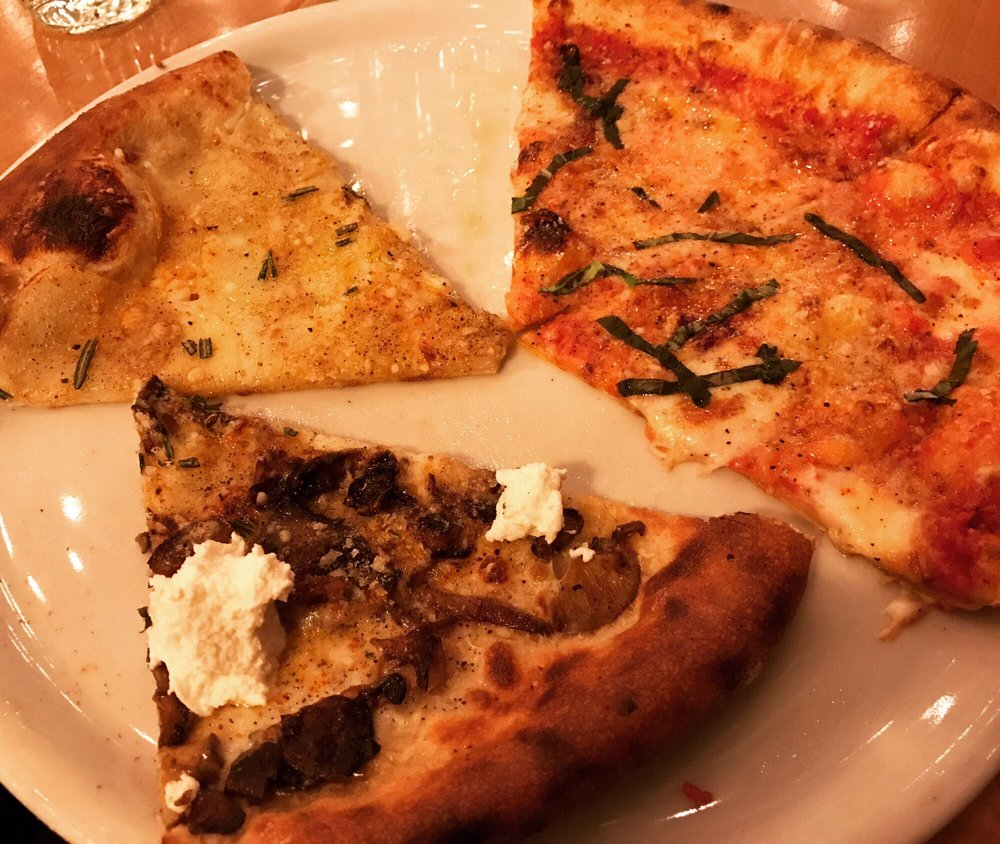

  Larkin K. Rating: 5 Sentiment: positive
  Amanda B. Rating: 5 Sentiment: positive
  Mark X. Rating: 5 Sentiment: positive


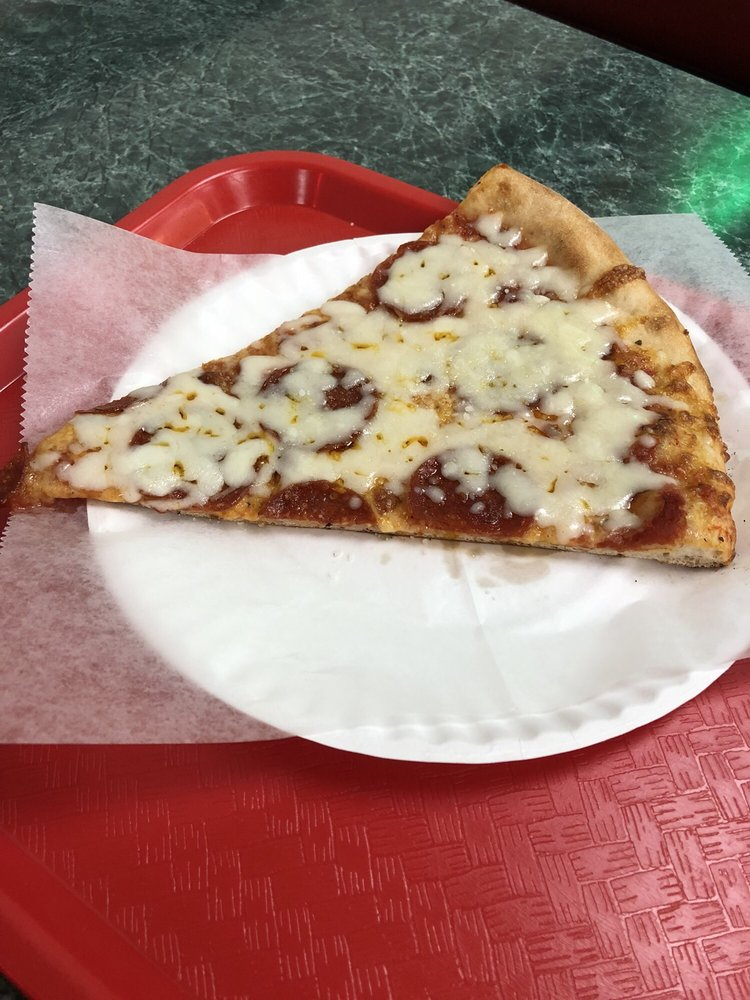

  Mark J. Rating: 5 Sentiment: positive
  Carrie J. Rating: 4 Sentiment: positive
  David C. Rating: 4 Sentiment: positive


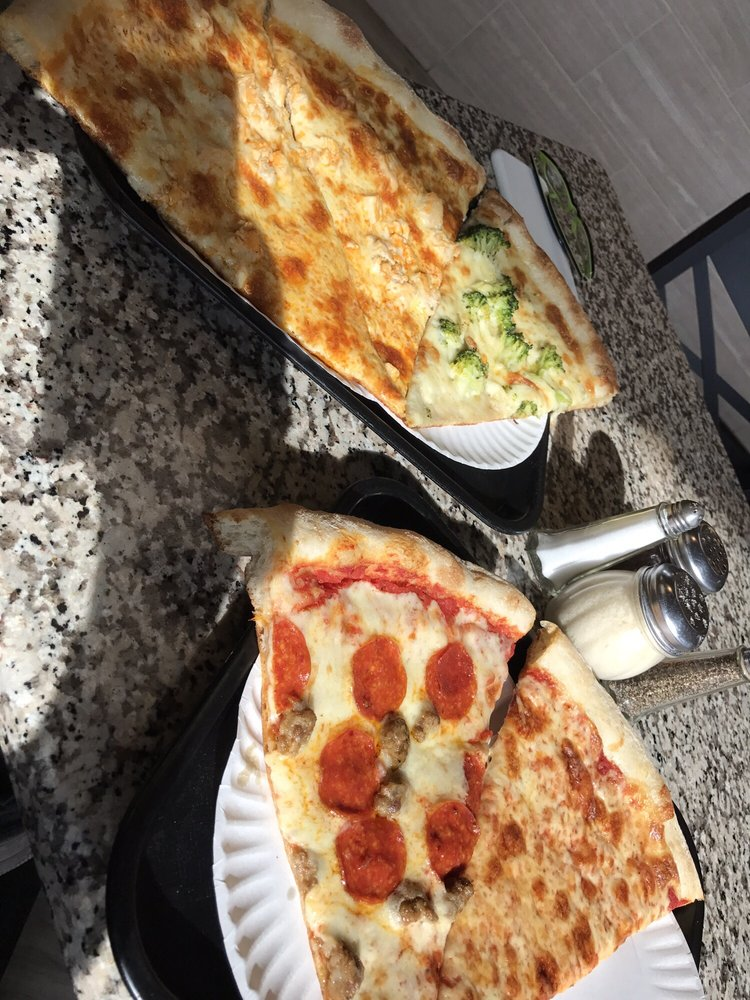

  Lance C. Rating: 5 Sentiment: negative
  Coy W. Rating: 4 Sentiment: positive
  A.L H. Rating: 5 Sentiment: positive


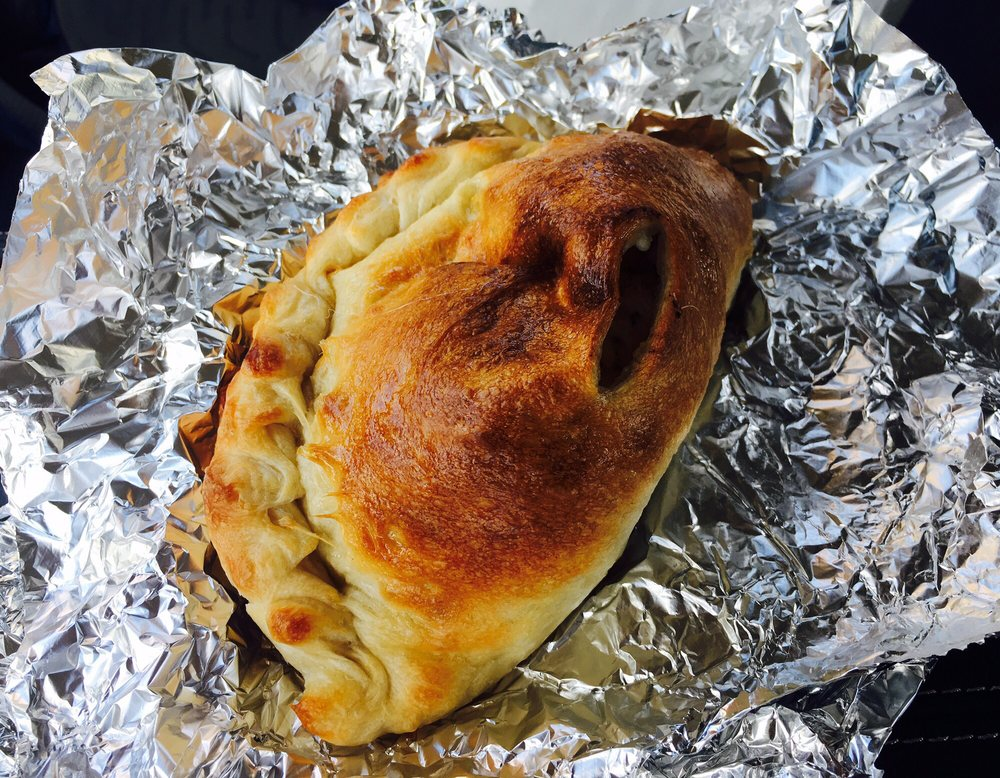

  Anthony L. Rating: 5 Sentiment: positive
  Donald S. Rating: 5 Sentiment: mixed
  Joshua D. Rating: 4 Sentiment: positive


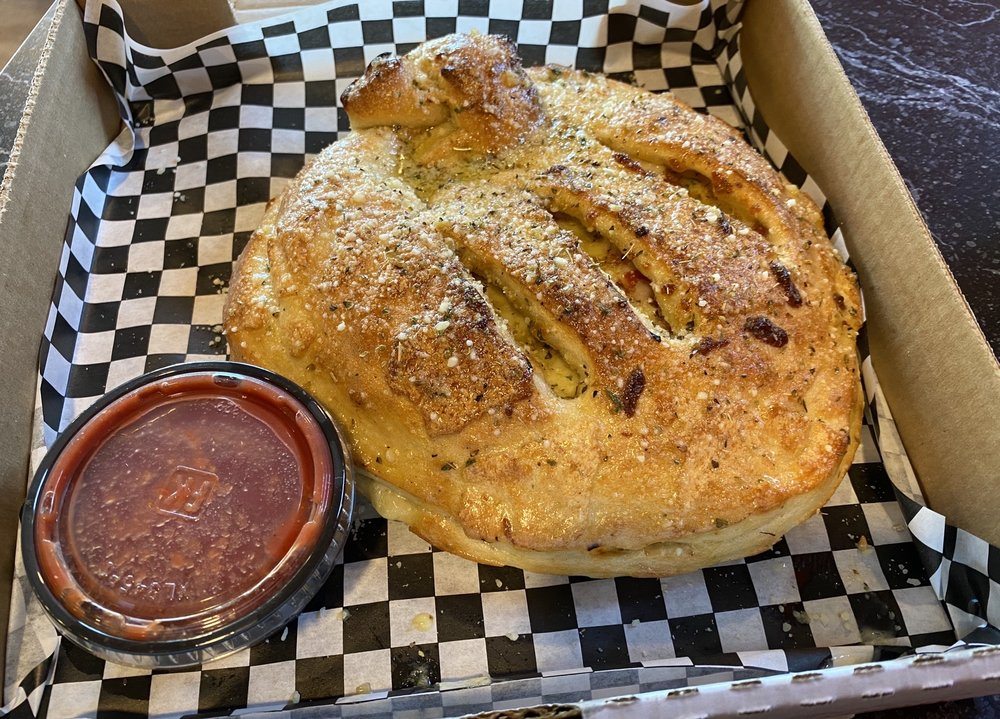

  Amanda K. Rating: 5 Sentiment: positive
  Ciara M. Rating: 5 Sentiment: mixed
  R T. Rating: 3 Sentiment: positive


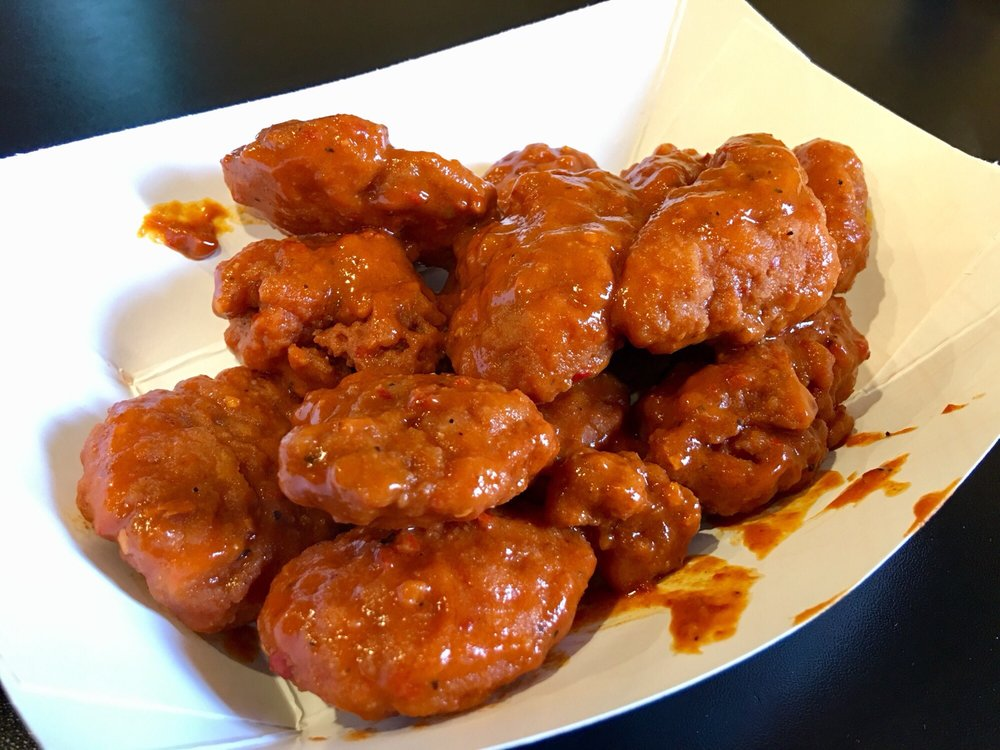

  Brandon D. Rating: 5 Sentiment: mixed
  Cody P. Rating: 5 Sentiment: positive
  Tito r. Rating: 5 Sentiment: positive


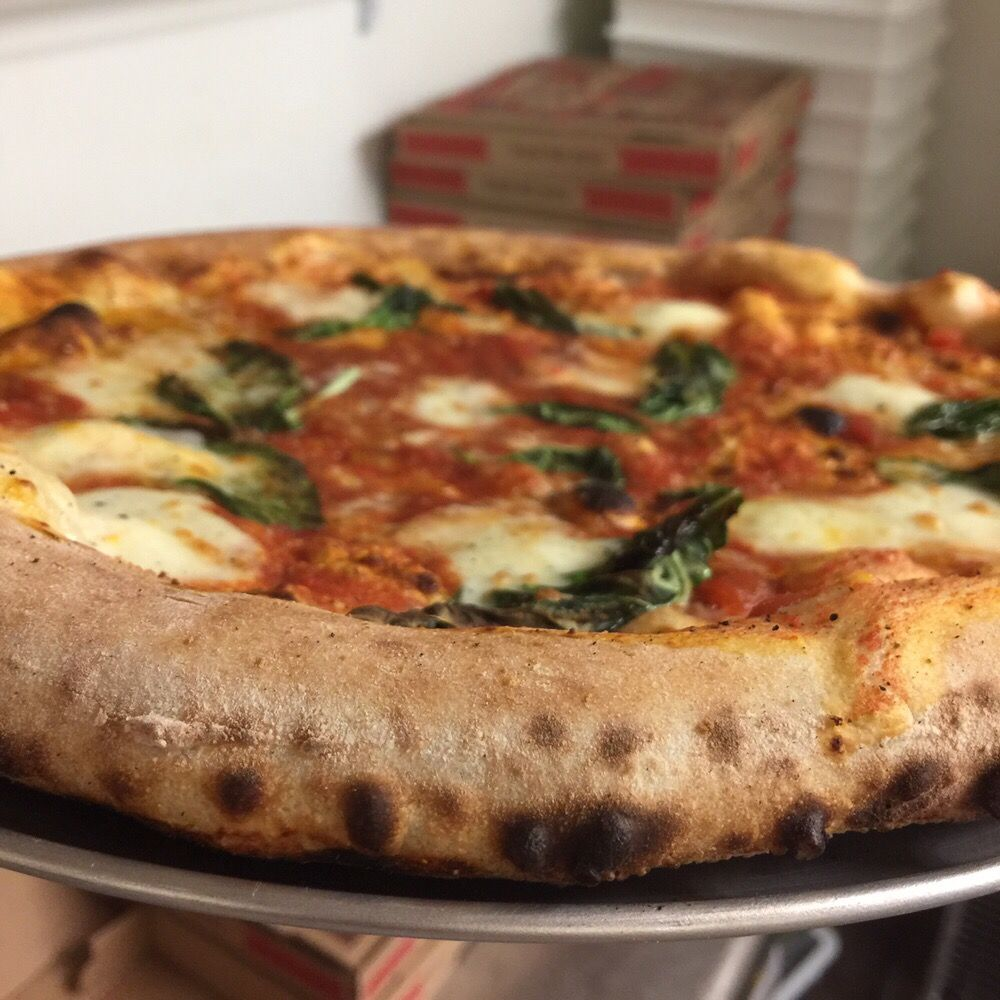

  Tammy S. Rating: 5 Sentiment: positive
  Rachel B. Rating: 5 Sentiment: positive
  Clint H. Rating: 5 Sentiment: positive


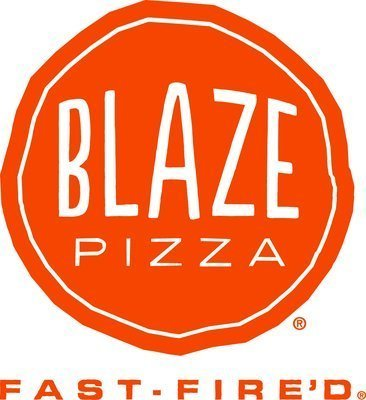

  Grant D. Rating: 5 Sentiment: neutral
  Alikya M. Rating: 4 Sentiment: positive
  Victoria G. Rating: 4 Sentiment: positive


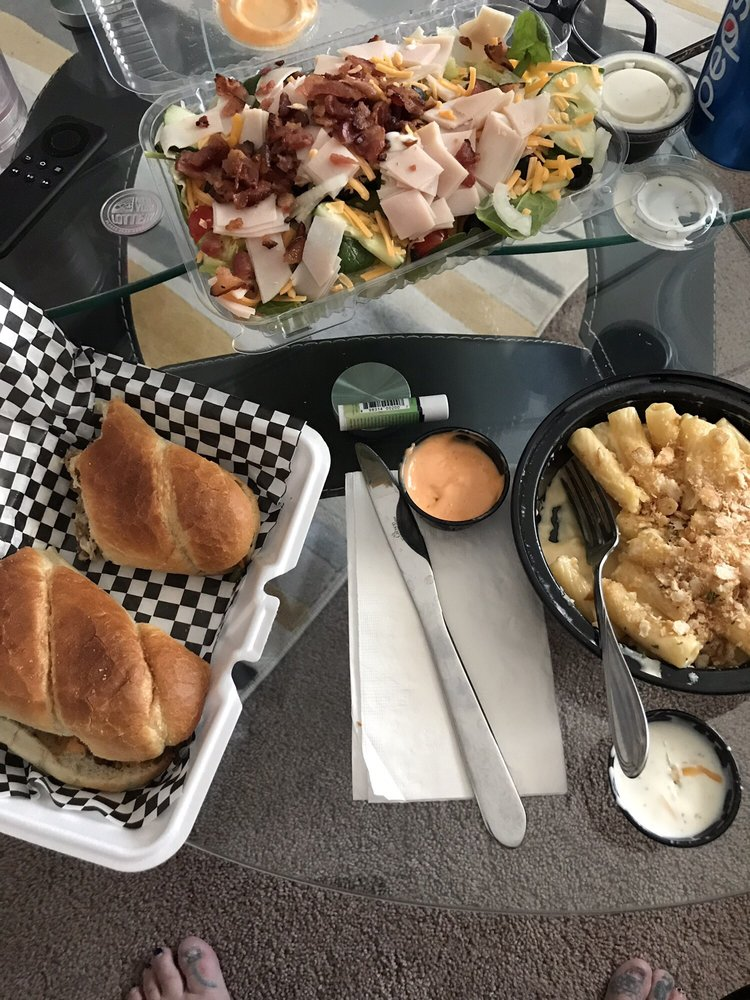

  Lea T. Rating: 5 Sentiment: positive
  Melissa M. Rating: 3 Sentiment: neutral
  Debbie W. Rating: 4 Sentiment: positive


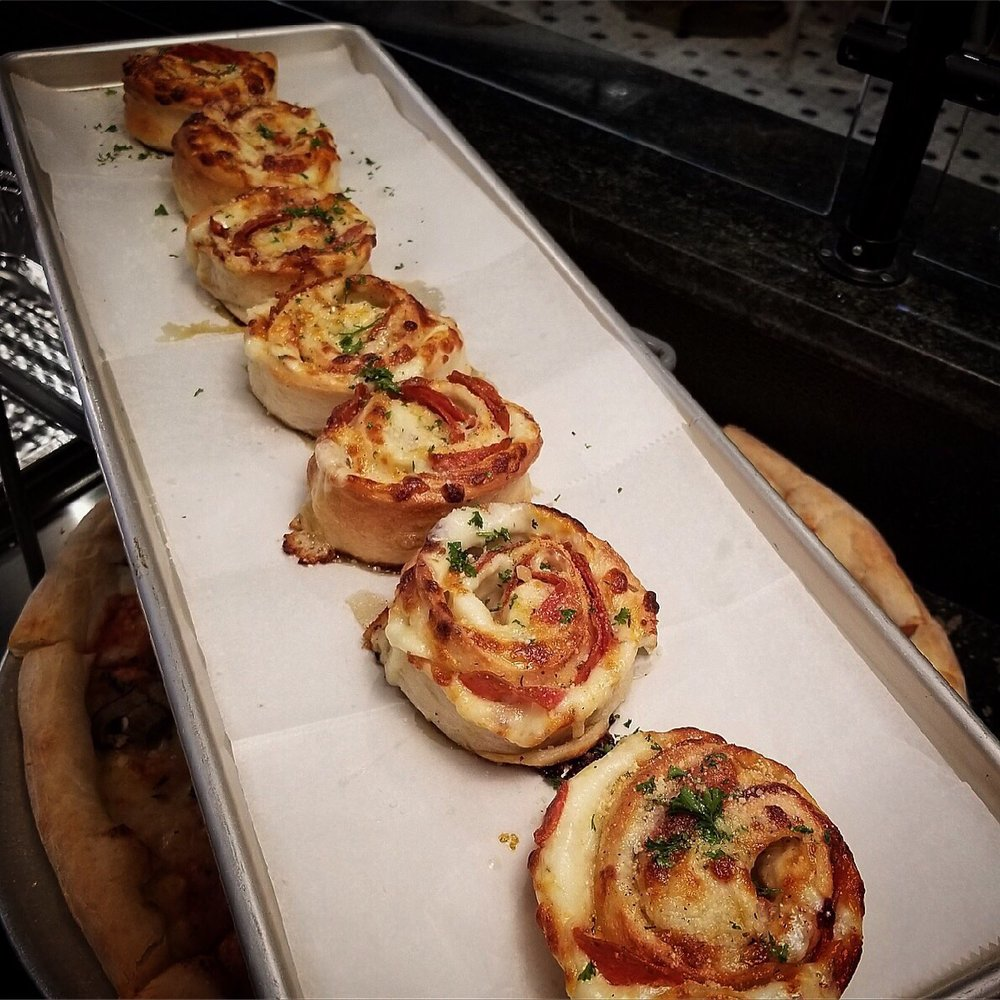

  Jim C. Rating: 5 Sentiment: neutral
  Maddy F. Rating: 3 Sentiment: negative
  Sean B. Rating: 5 Sentiment: positive


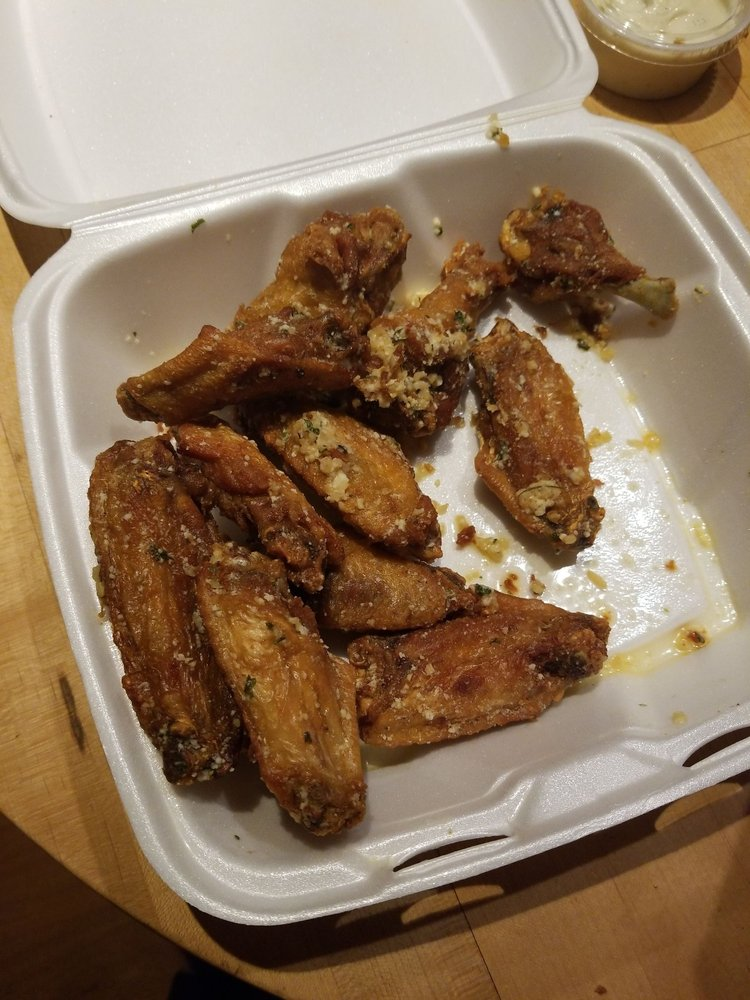

  Mike H. Rating: 5 Sentiment: positive
  Susan C. Rating: 5 Sentiment: positive
  Dave K. Rating: 5 Sentiment: positive


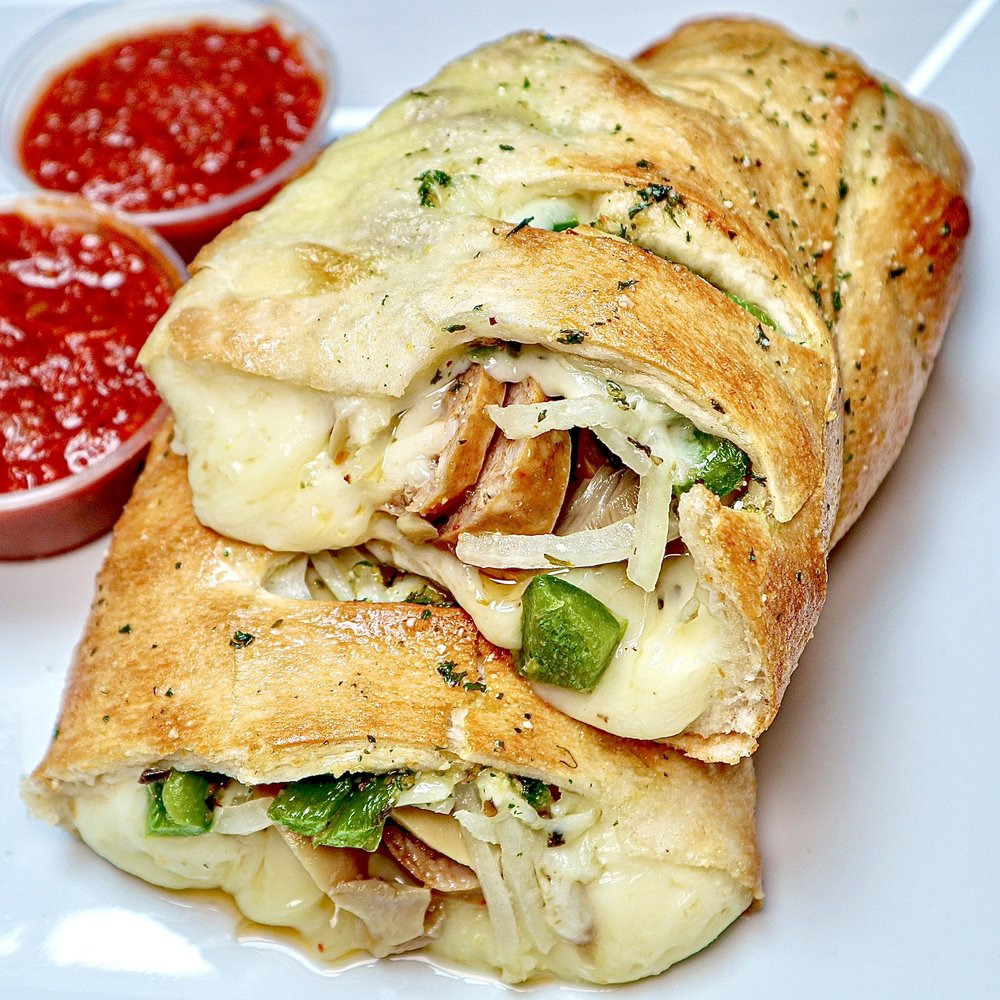

  Barbara B. Rating: 5 Sentiment: positive
  Jenn B. Rating: 5 Sentiment: positive
  Mara K. Rating: 1 Sentiment: positive


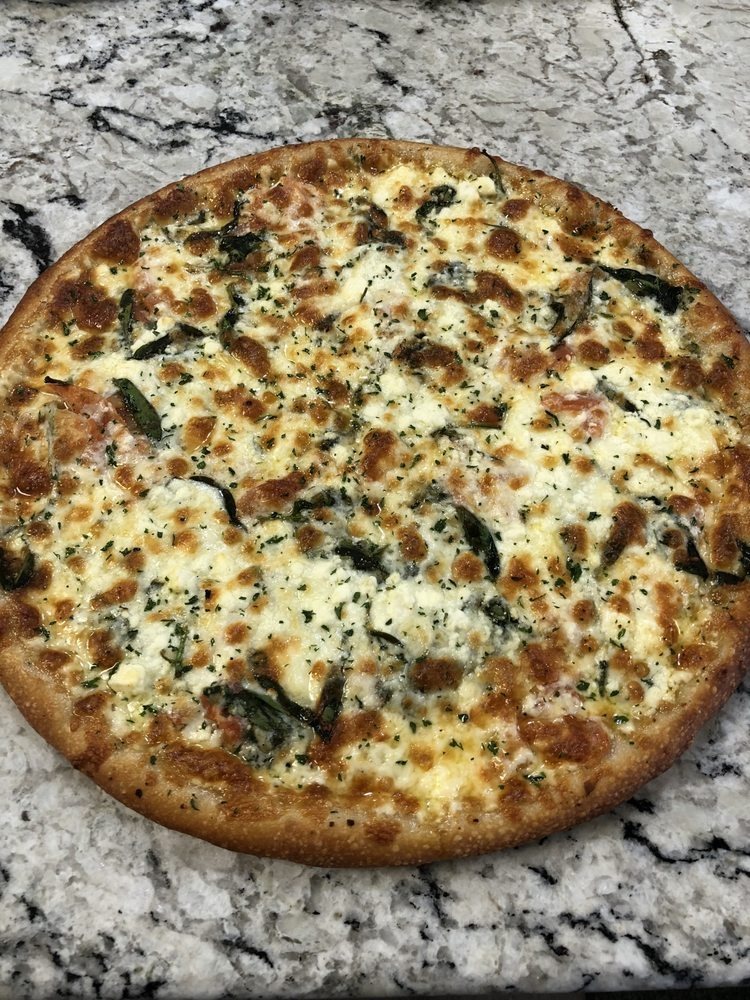

  Omar M. Rating: 5 Sentiment: positive
  Dan N. Rating: 5 Sentiment: positive
  Laith B. Rating: 5 Sentiment: positive


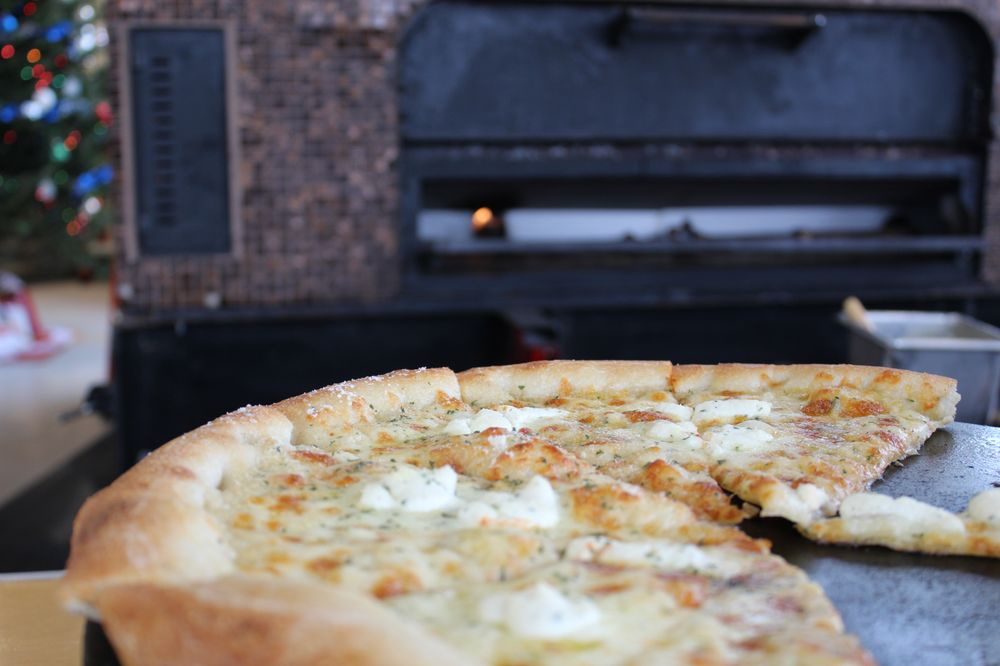

  Patrick C. Rating: 5 Sentiment: neutral
  Matt C. Rating: 4 Sentiment: negative
  Vince V. Rating: 2 Sentiment: neutral


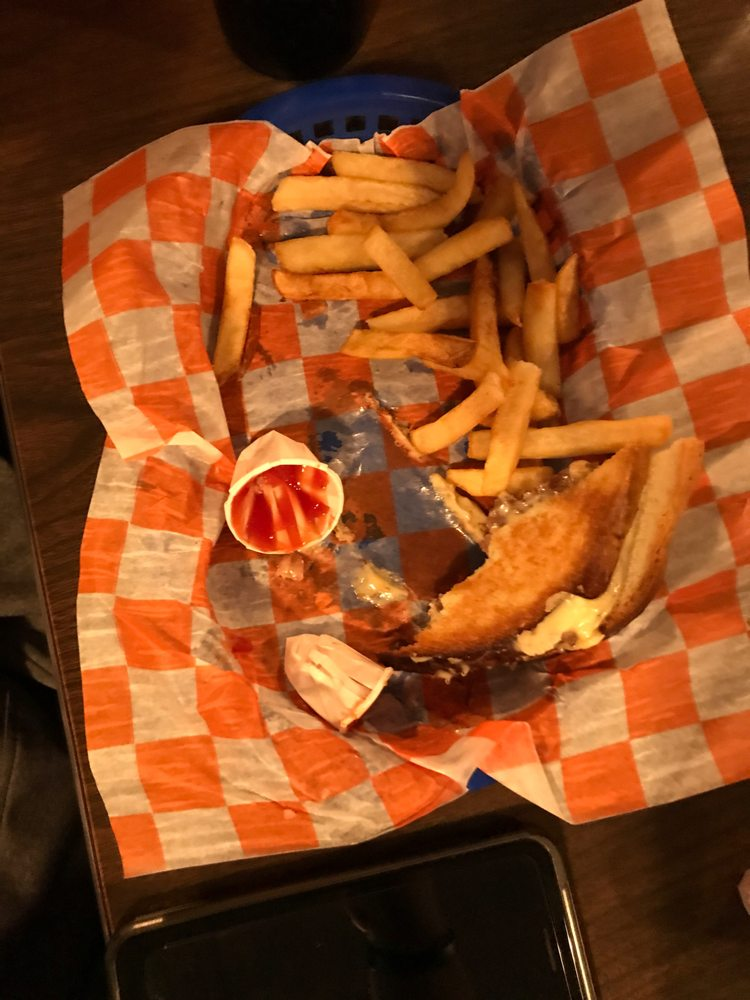

  Gino M. Rating: 5 Sentiment: positive
  Cassie C. Rating: 3 Sentiment: mixed
  Fox E. Rating: 4 Sentiment: neutral


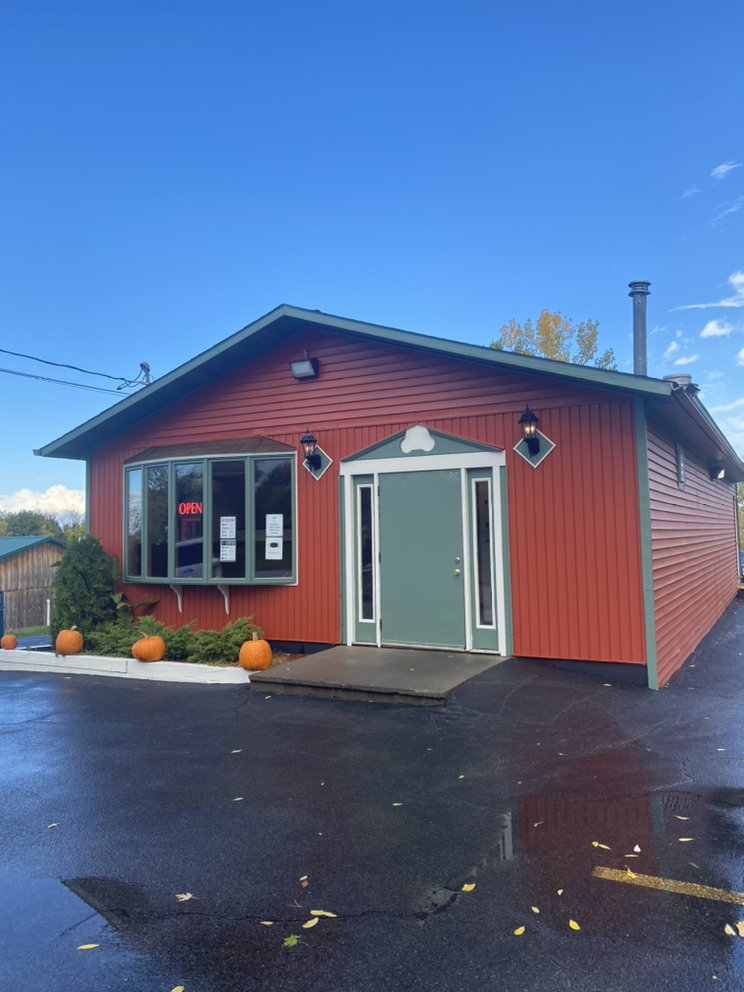

  Rudy R. Rating: 5 Sentiment: positive
  Julie N. Rating: 5 Sentiment: positive
  Matt C. Rating: 5 Sentiment: positive


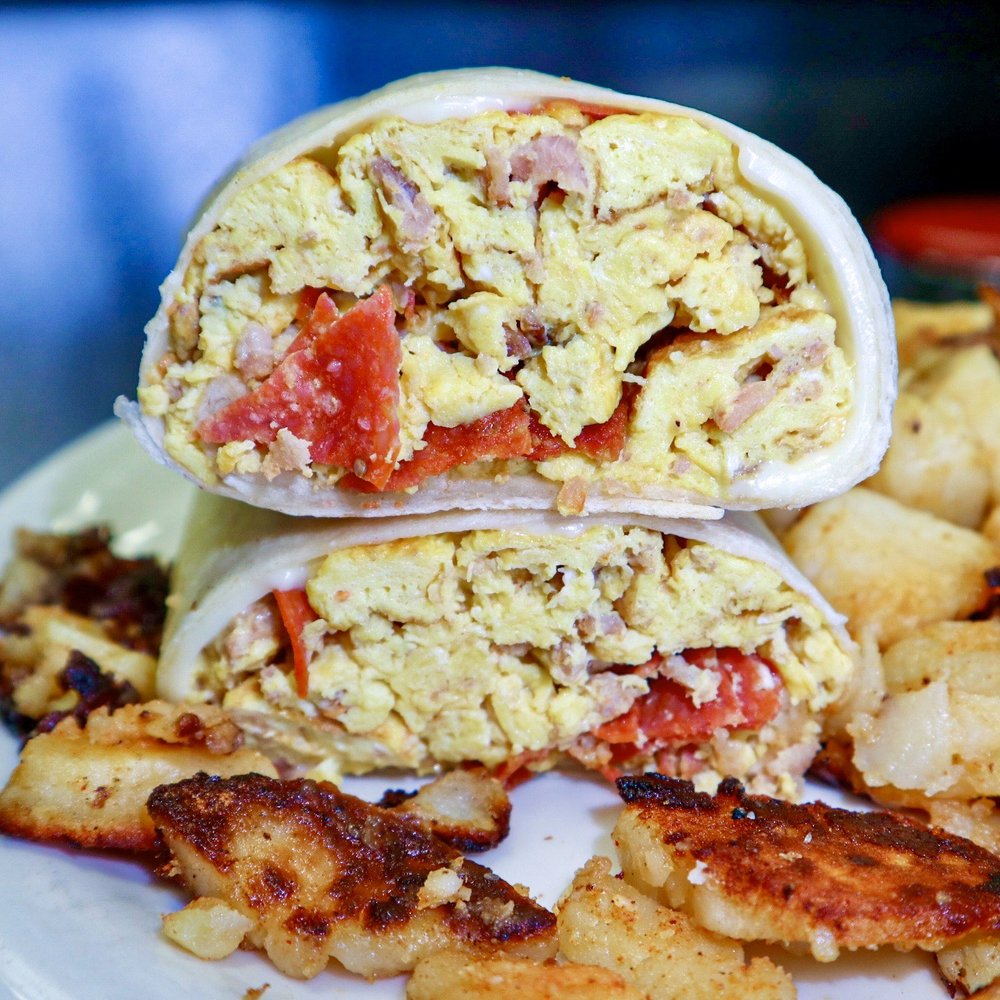

  Jennifer S. Rating: 5 Sentiment: neutral
  Marc R. Rating: 4 Sentiment: positive
  Boris M. Rating: 4 Sentiment: positive


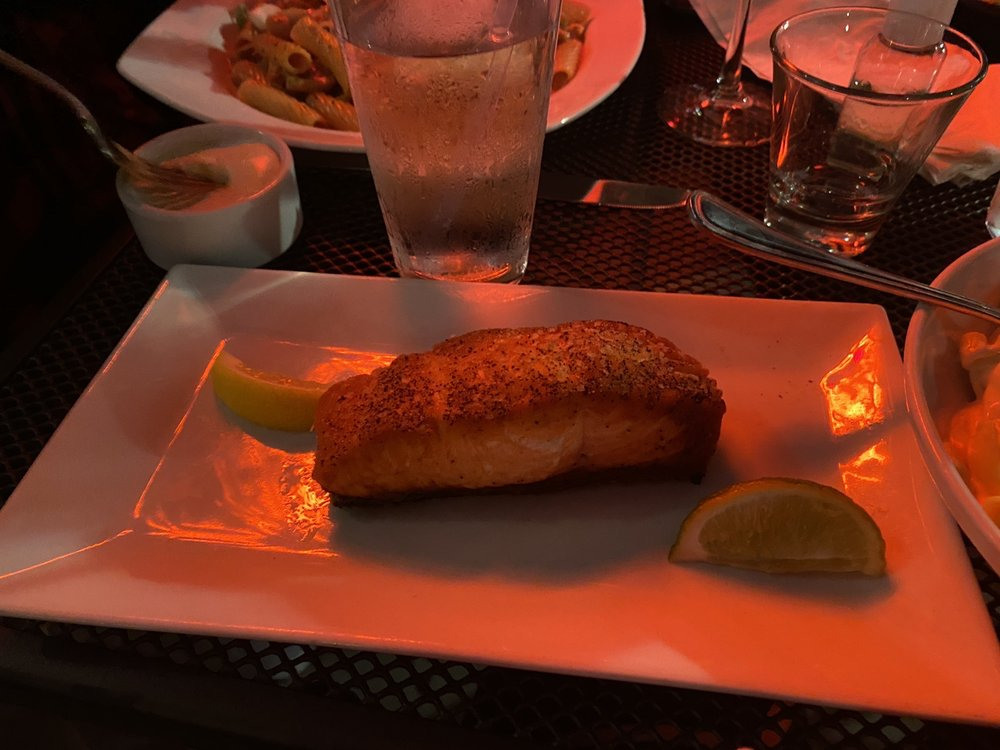

  Cody P. Rating: 5 Sentiment: positive
  Emily P. Rating: 5 Sentiment: negative
  Holly V. Rating: 5 Sentiment: positive


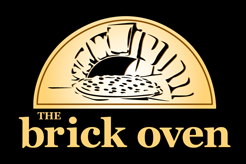

  Dawn A. Rating: 5 Sentiment: positive
  Sean M. Rating: 3 Sentiment: mixed


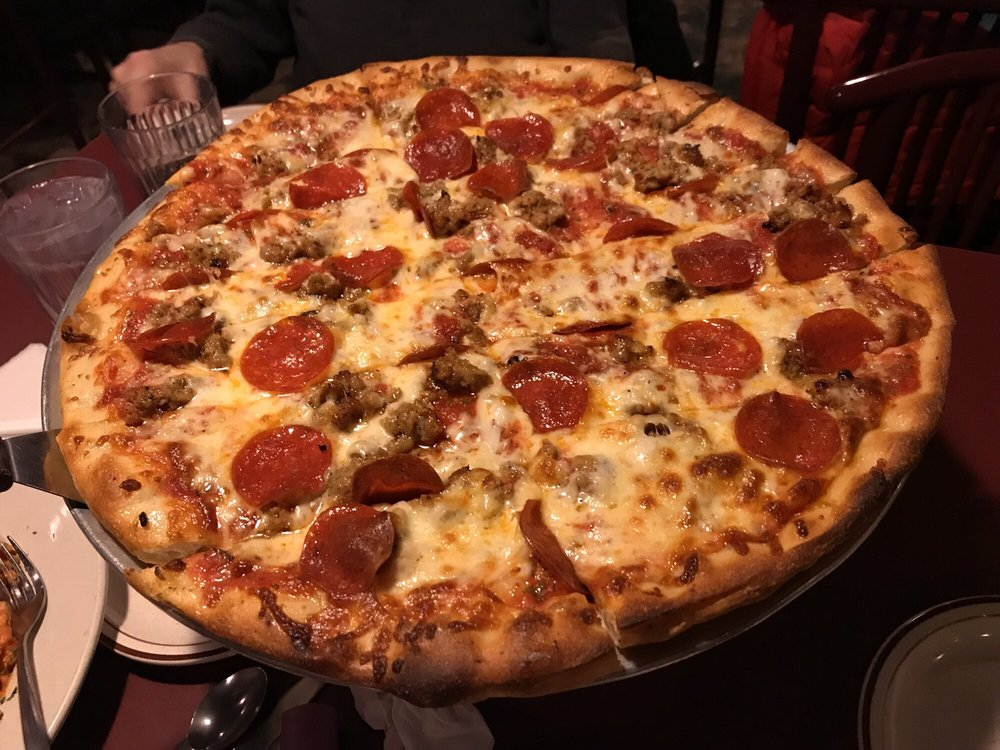

  Sean V. Rating: 4 Sentiment: mixed
  Cynthia H. Rating: 4 Sentiment: positive
  Nate L. Rating: 1 Sentiment: negative


In [9]:
# main program 
cuisine = input("Enter a cuisine: ")
location = "Syracuse, NY"
results = yelp_search(cuisine, location)

display(HTML(f"<h1>{cuisine.title()} in {location}"))
for business in results['businesses']:
    display(HTML(f"<h2>Review Analysis for <em>{business['name']}</em></h2>"))
    display(Image(business['image_url'], width=200))
    reviews = yelp_reviews(business['id'])
    for review in reviews['reviews']:
          sentiment = get_sentiment(review['text'])
          print(f"  {review['user']['name']} Rating: {review['rating']} Sentiment: {sentiment}")